In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip

--2022-09-20 13:33:19--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.148.122
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.148.122|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]  28.22M  18.8MB/s    in 1.5s    

2022-09-20 13:33:21 (18.8 MB/s) - ‘images.zip’ saved [29586716/29586716]



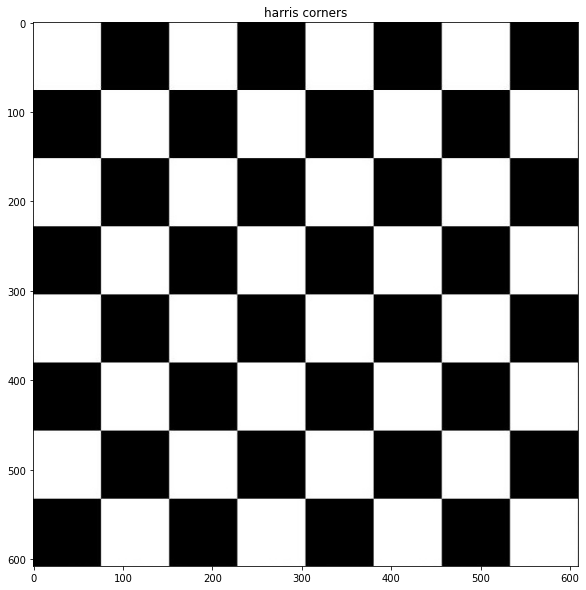

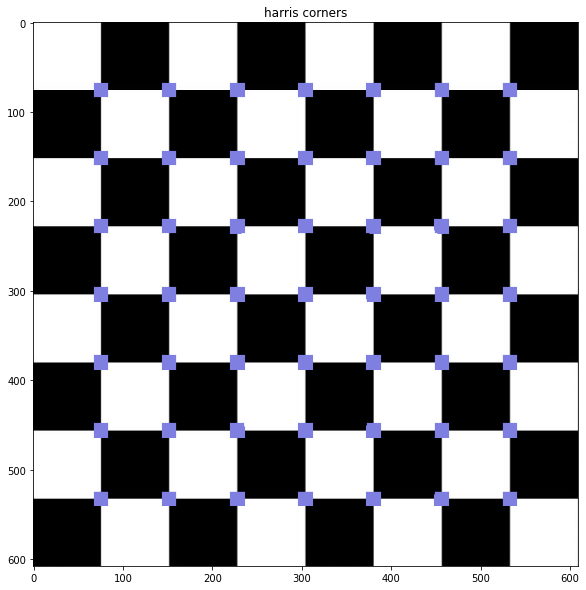

In [20]:
image = cv2.imread('/content/images/chess.JPG')
imshow('harris corners', image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)

harris_corners = cv2.cornerHarris(gray ,3 ,3 ,0.05)

kernel = np.ones((7,7),np.uint8)
harris_corners = cv2.dilate(harris_corners, kernel, iterations = 2)

image[harris_corners >0.025 * harris_corners.max()] = [225,127,127]
imshow('harris corners', image)

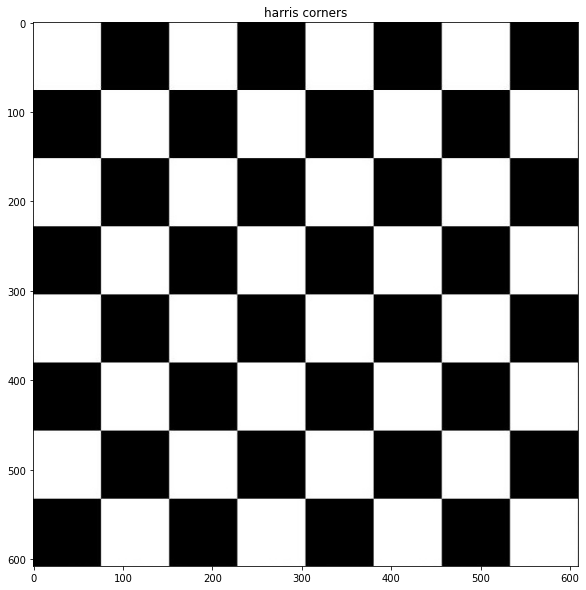

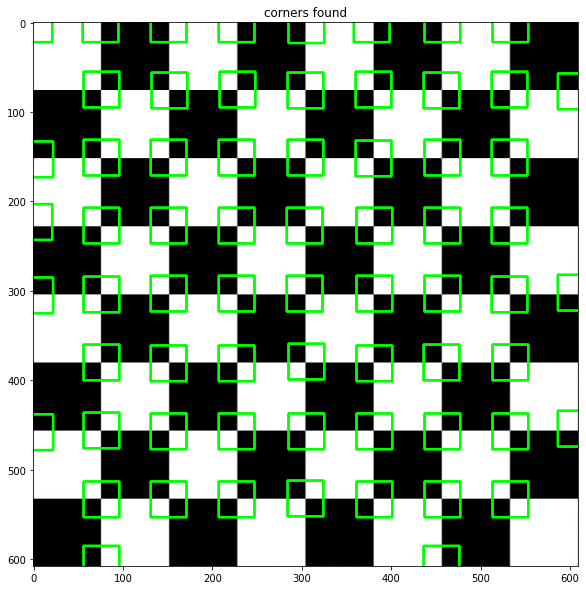

In [27]:
image = cv2.imread('/content/images/chess.JPG')
imshow('harris corners', image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray, 150,0.0005,10)

for corner in corners:
  x,y = corner[0]
  x= int(x)
  y = int(y)
  cv2.rectangle(image,(x-20,y-20),(x+20,y+20),(0,255,0),2)

imshow('corners found', image)